# Assignment 3

This assignment is due on __Sunday 28 January__, by midnight. It pertains to content taught in classes 5-7.

This assignment should be completed in Python, and a PDF file should be submitted, containing both code and written answers. If you like, you may create your own Jupyter Notebook file from scratch, but it is likely easier to modify this one.

As before, questions that require identification and/or interpretation will not penalized for brevity of response: if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. If you incorporate code from the internet (which is not required and generally not advisable), please cite the source within your code (providing a URL is sufficient).

If you like, you may collaborate with others in the class. If you choose to do so, please indicate with whom you have worked at the top of your PDF. Separate submissions are required.

Any questions can be addressed to Kamilah ([kamilah.ebrahim@mail.utoronto.ca]()) and/or Ananya ([ananya.jha@mail.utoronto.ca]()) before the due-date. Please sumbit your assistments through this [link](https://forms.gle/qSnbougKaH5cvntb8).

### Question 1: Data cleaning and visualization

For this assignment, we'll use the in-built dataset `credit` from `ISLP` library.

In [9]:
# Import standard libraries
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
import seaborn as sns

# Import specific objects
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence \
     import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

# Load dataset
my_df = load_data('credit')
my_df

,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,12.096,4100,307,3,32,13,Male,No,Yes,Caucasian,560
396,397,13.364,3838,296,5,65,17,Male,No,No,African American,480
397,398,57.872,4171,321,5,67,12,Female,No,Yes,Caucasian,138
398,399,37.728,2525,192,1,44,13,Male,No,Yes,Caucasian,0


Before modeling, it's essential to "get a feel" for our data. Use the `credit?` function to answer the following questions:

_(i)_ How many variables (columns) are there?  

_(ii)_ How many observations (rows) are there?  

_(iii)_ How many factor variables are there?  

_(iv)_ What are the factor labels (English) and levels (value) of the `Married` variable?

_(v)_ What is the range of the `Cards` variable?

_(vi)_  It is very important to understand if our data has missing values, which R represents as `NA`. Below, show that there are 0 NA values in the dataset. (Hint: you can use the function `np.isnan()` to search for `NA` values, and wrap that with the `sum()` function, to provide a total count.)

In [11]:
# Add your code here

It is also very important to visualize our data before modeling. The `sns.pairplot()` function visualizes the pair-wise correlations between all variables.

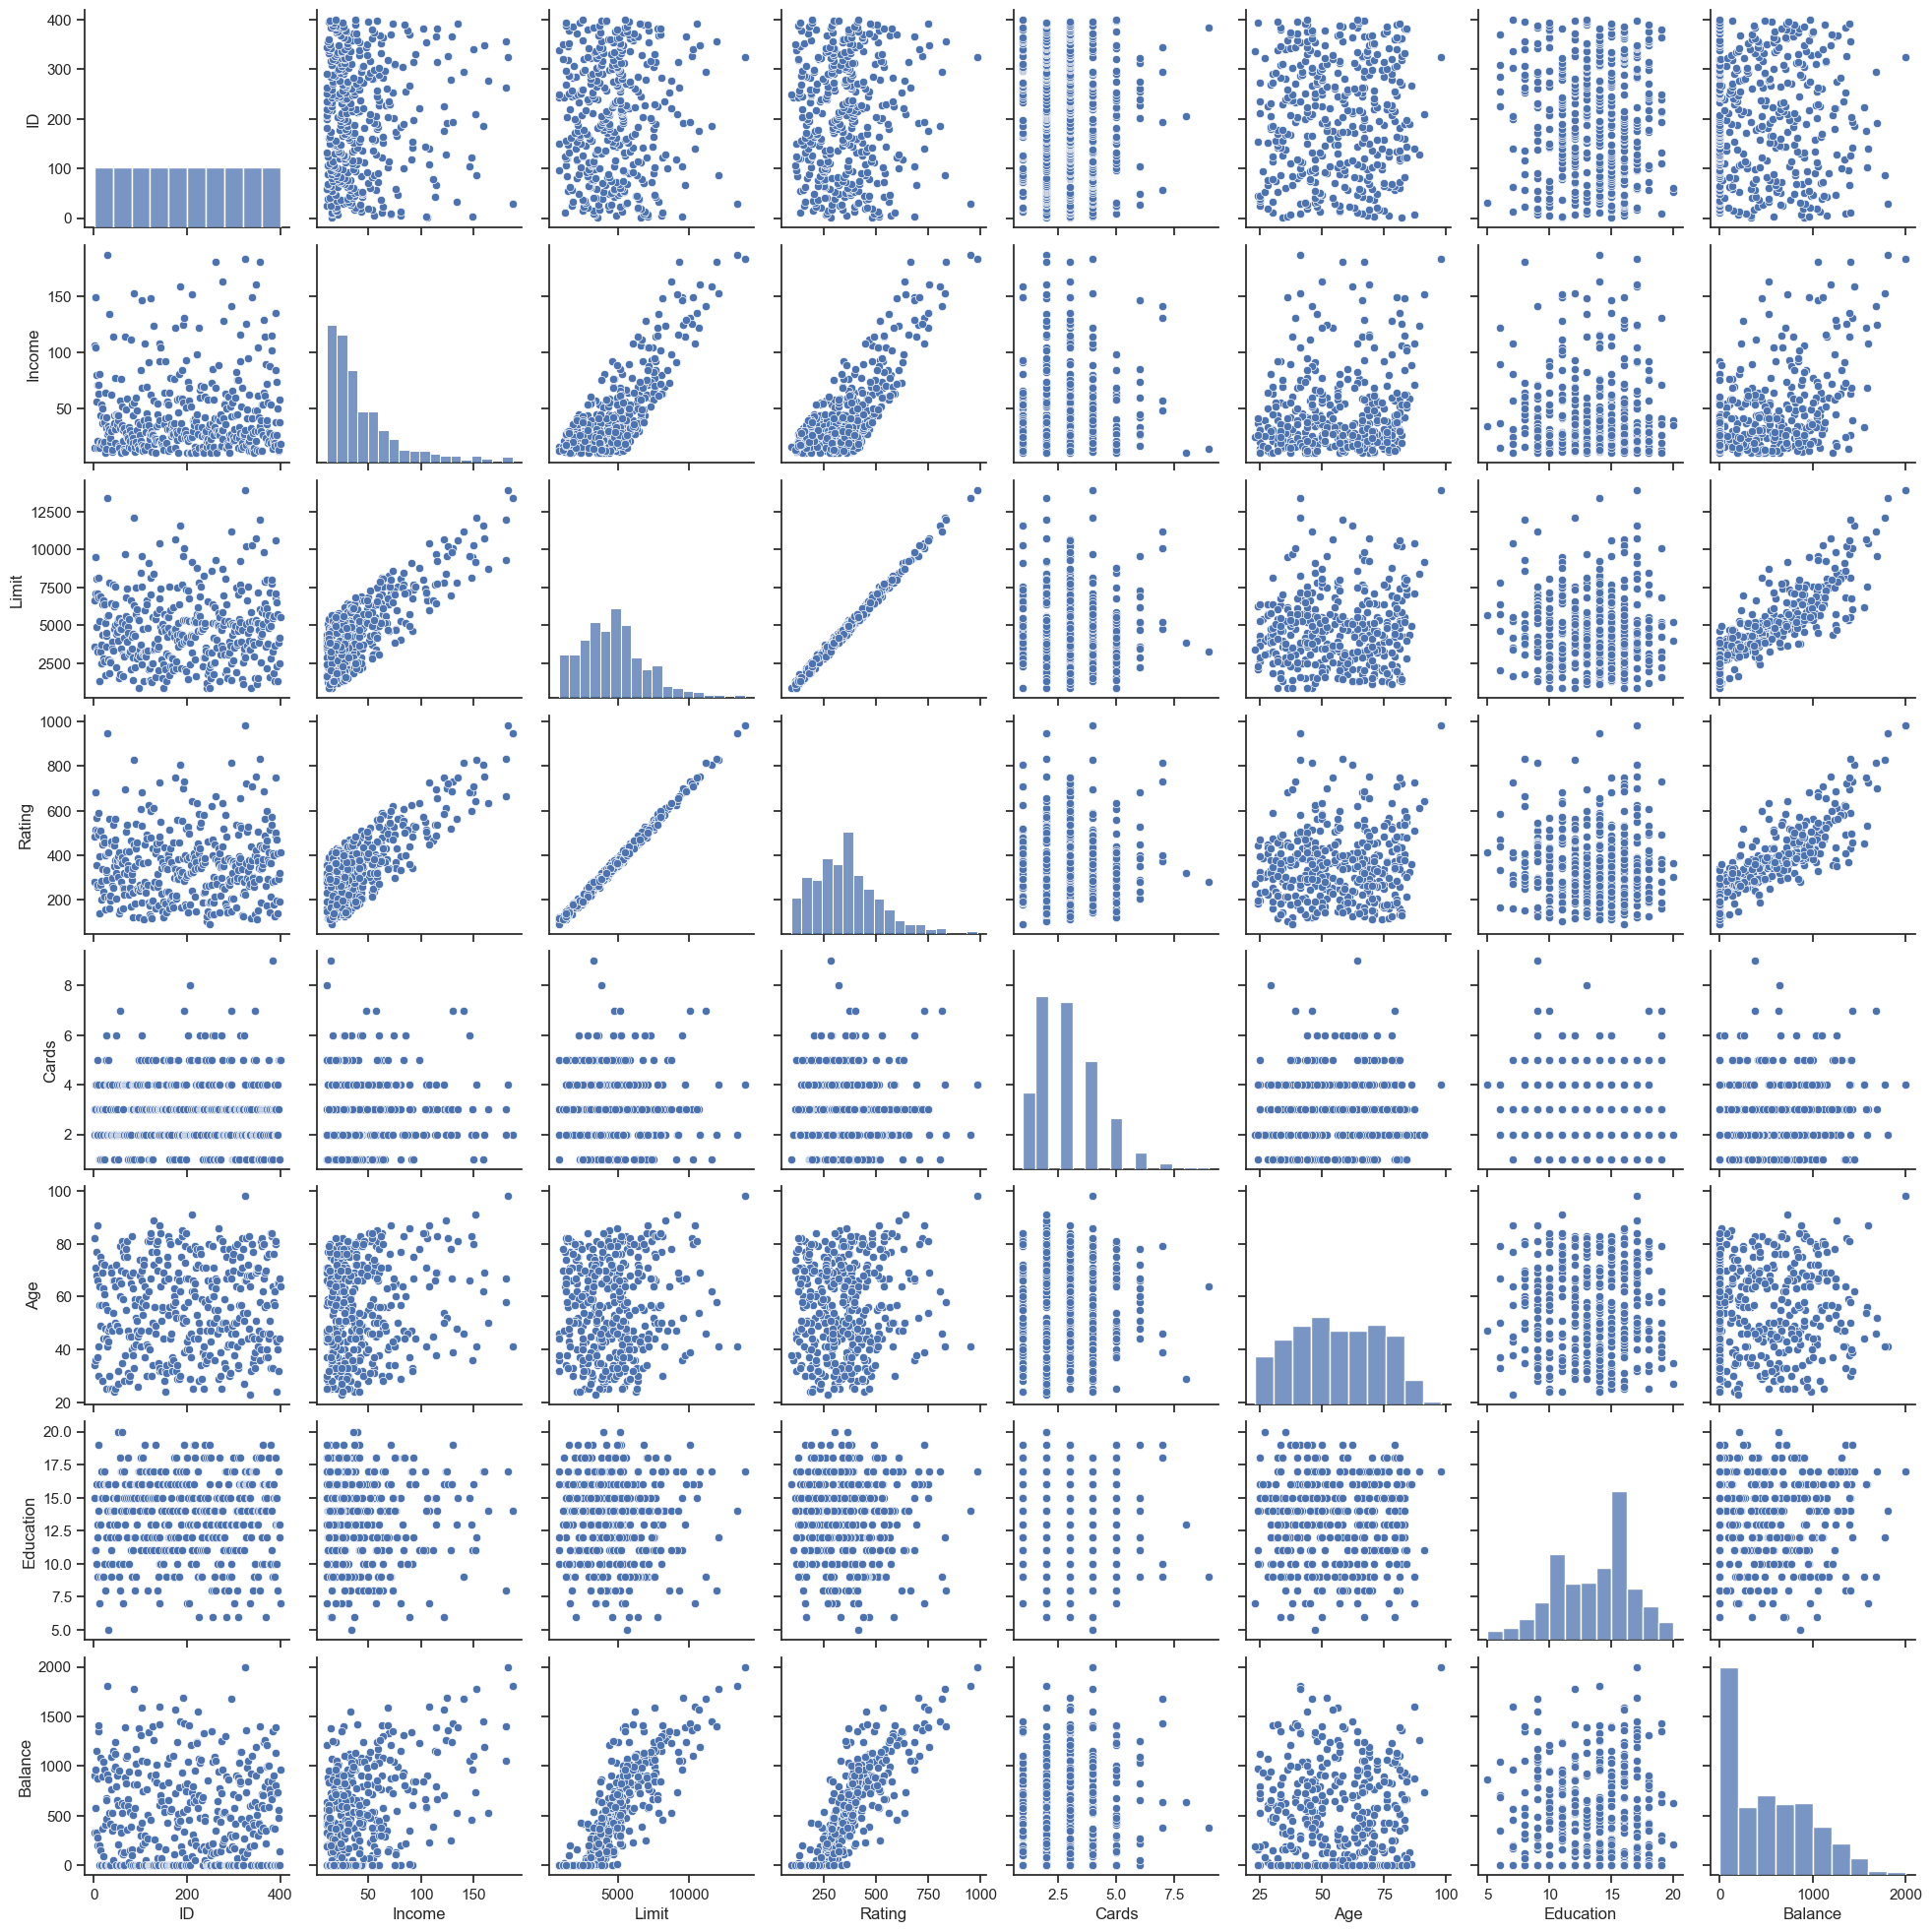

In [11]:
numeric_columns = my_df.select_dtypes(include=['float64', 'int64'])

# Create a scatterplot matrix
sns.set_style("ticks")
sns.pairplot(numeric_columns)

_(vii)_ Which variable pair looks as if it has the strongest correlation?    

_(viii)_ Name a variable pair that looks as though it has no/little correlation (many correct answers).   

_(ix)_  Why do correlation pairs including the `Region` variable have three columns/rows of points?    

_(x)_  For much of our modelling, we'll make use of a separate training and testing set. Choose your favourite method to split `my_df` into equally-sized training and testing sets. For clarity, call your training set `train`, and your testing set `test`. 

In [13]:
# Add your code here

Congrats! Now that our data is familiar and 'clean', let's turn to modeling.

### Question 2: Regularization via Shrinkage

Shrinkage methods can "extend" or improve upon linear model fits, by pushing coefficients towards (ridge regression) or to zero (lasso), and thus reducing variance. Let's perform ridge regression, using the `skl.ElasticNet()` function. 

In [14]:
# load data

Use our `my_df` dataset (deriving from Credit). Let's use `Balance` as the response variable, and all other variables as predictors. 

_(i)_ A necessary first step is to get our data into the format expected. Specifically, we must provide predictor variables in a matrix, and the response variable in a vector. For clarity, call the predictor matrix `x`, and the response vector `y`. (Hint: your `x` matrix should have should 400 rows and 11 columns. Verify that this is true, using in-built functions of your choice).  

In [15]:
# create a matrix of the predictor variables 

# create a vector of the response variable

Let's check out how `ModelSpec()` has transformed our data. Compare the names of variables in our matrix `x`, compared to `my_df` (hint: use the `columns` function), and answer:

_(ii)_ Which "type" of variables (numeric, character, factor, etc.) have a new name in `x`?  

_(iii)_ Which variable in `x` has two columns dedicated to it? Why? 

_(iv)_ What variable in `my_df` is missing in x? Why might this be?    

Now that we understand how our data is represented, we can move on to modelling. Fit a ridge regression model, using `skl.ElasticNet()`. (Hint: remember to set the alpha value!)

In [16]:
# Add your code here

_(v)_ An essential part of ridge regression (and shrinkage methods more broadly) is to identify an 'ideal' lambda value. Use the appropriate function from `sk.learn` to identify this lambda value via cross-validation. (Hint: remember that `x` and `y` should not consist of the complete dataset!)

In [17]:
# Add your code here

_(vi)_ By default, cross validation via `skl.ElasticNet()` considers n=100 lambda values. The cross-validated model object that you created in the step above stores these n=100 lambda values within it. Print them here (Hint: use the `$` to "look inside" your model.)

In [18]:
# Add your code here

_(vii)_ Visualize your cross-validation results using `plot`. 

In [19]:
# Add your code here

_(viii)_ Now, look inside your cross-validated object to pull out the lambda value with the smallest error (Hint: the value will be that shown by the first, left-most vertical dotted line.)

In [20]:
# Add your code here

_(ix)_ In your plot, what does the second (right-most) vertical dotted represent? (Hint: read the help documentation pertaining to `l1_ratio=0`.). 

_(x)_ We can now refit ridge regression, for the entire dataset, with the ideal lambda value. Use the lambda value with the smallest error. Provide an argument to print the estimated coefficients (Hint: check out the `type` argument.

In [21]:
# Add your code here

_(xi)_ Did you expect any coefficients to be exactly 0? Why or why not?  

_(xii)_ The plot created above shows that the ideal 'tuning' (penalty) provided by lambda is comparatively small (one of the smallest considered by `skl.ElasticNet()`, if not the smallest). What might this suggest? In your answer, consider the nature of the `Credit` dataset.

### Question 3: Decision (regression) tree

Decision trees partition a dataset into smaller subgroups, and then fit a constant for every observation in a given subgroup. This method is well-able to model non-linear associations, and can be helpfully visualized.

Let's continue to work with `my_df` (deriving from the `Credit` dataset). We will use the `tree` library.

_(i)_ Below, fit a tree in the training set. Use `Balance` as the response variable, and all other variables as predictors. 

In [22]:
# Add your code here

_(ii)_ Plot your tree, with text.

In [23]:
# Add your code here

Review the plot and/or the model `summary` to answer the following questions:

_(iii)_ What is the most important variable for predicting `Balance` (Hint: what variable is at the top of the tree, i.e., the "root")?  

_(iv)_ How many terminal nodes ("leafs") are there?

_(v)_ What is the tree's error? (Hint: Look for `Residual mean deviance`)

_(vi)_ Imagine an individual with the following characteristics: A `Limit` of $1000, and a `Rating` of 100. What would you predict their `Balance` to be?  

In a sentence or two, answer the following conceptual questions about regression trees:

_(vii)_ Regression trees are created via "recursive binary splitting". Why do we call recursive binary splitting a "top down", or "greedy", approach?  

_(viii)_ Why is "greediness" required?  

_(ix)_ We often "cut" a tree when a given terminal node ("leaf") has fewer than some fixed number of observations (e.g., n=5). Why is this?  

_(x)_ Next, let's determine if our tree would benefit from "pruning". Below, call the appropriate cross-validation function on our tree model.

In [24]:
# Add your code here

_(xi)_ Plot the cross-validation results.

In [25]:
# Add your code here

_(xii)_ The cross-validation function operates via k-fold. Review the help documentation this function. How many folds are fit by default?

_(xiii)_ Does this tree require pruning? How do you know?

Decision trees are often unstable (i.e., they greatly reflect the particular sample upon which they were created; this limitation motivates "ensemble methods", including random forest). 

_(xiv)_ If we were to fit the same tree model but in a new random sample, where would you expect to see the most variability: the top decision node ("root"), or the terminal nodes ("leafs")? Why? (You can test this if you like, but code is not required.)

### Bonus Question: Polynomial regression

Let's again work with our `my_df`. Again, let's use `Balance` as the response variable, but this time, for ease, let's use only a single variable `Age` as a predictor. 

_(i)_ Fit four models: polynomial models with orders 2, 3, and 4, respectively, as well as the linear model for comparison.

In [26]:
# Add your code here

_(ii)_ We will compare these four models, to see which provides the better fit. What is the null hypothesis, $H_0$? What is the alternative hypothesis, $H_1$? 

_(iii)_ Compare these four models, using ANOVA. (Hint: remember, models must be entered in order of complexity).

In [27]:
# Add your code here

_(iv)_ Based on the ANOVA results, can we reject the null hypothesis?  

_(v)_ Based on the ANOVA results, which model do we say is best?  

In [28]:
# Write your answer here